# Démonstration du fonctionnement de la classe Neuron

In [ ]:
import numpy as np
from multilayer.activation import Activation
from multilayer.neuron import Neuron

neuron = Neuron(input_size=3, activation=Activation("sigmoid", c=3))

neuron.weights = np.ones_like(neuron.weights) # set to 0 for demo purposes
neuron.bias = 0 # same

x = np.array([2.0, -0.1, 0.1])
output = neuron.forward(x)

print(neuron)
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print("Linear Output (z):", neuron.z)
print("Activated Output (a):", output)

# Démonstration du fonctionnement de la classe Layer

In [ ]:
import numpy as np
from multilayer.layer import Layer

layer = Layer(units=2,activation="sigmoid",input_size=3, c=3)

for neuron in layer.neurons: # Set neuron values for demo purposes
    neuron.weights = np.ones_like(neuron.weights)
    neuron.bias = 0

x = np.array([2.0, -0.1, 0.1])
output = layer.forward(x)

print(layer)
print("Linear outputs :", [neuron.z for neuron in layer.neurons])
print("Activated Outputs :", output)

# Démonstration du fonctionnement de la classe Model

In [ ]:
import numpy as np
from multilayer.layer import Layer
from multilayer.model import Model

def debug_forward(model, x):
    print(f"Input: {x}")
    for i, layer in enumerate(model.layers):
        x = layer.forward(x)
        z_vals = [neuron.z for neuron in layer.neurons]
        a_vals = x
        print(f"Layer {i} - z: {z_vals}, a: {a_vals}")
    return x

model = Model([
    Layer(units=6, activation="threshold", input_size=2),
    Layer(units=2, activation="threshold"),
])

for layer in model.layers:
    for neuron in layer.neurons:
        neuron.weights = np.ones_like(neuron.weights)
        neuron.bias = 0

x = np.array([0.5, -0.2])
output = model.forward(x)

print(model)
print(f"Model Output:", output)
print("\nLayer by layer visualisation:")
debug_forward(model, x)


# Démonstration du multicouche sur XOR

Training complete after 1685 epochs.
epoch       1684.000
mse            0.001
accuracy       1.000
Name: 1684, dtype: float64
Case: [0, 0], answer: [0.]
Case: [0, 1], answer: [1.]
Case: [1, 0], answer: [1.]
Case: [1, 1], answer: [0.]


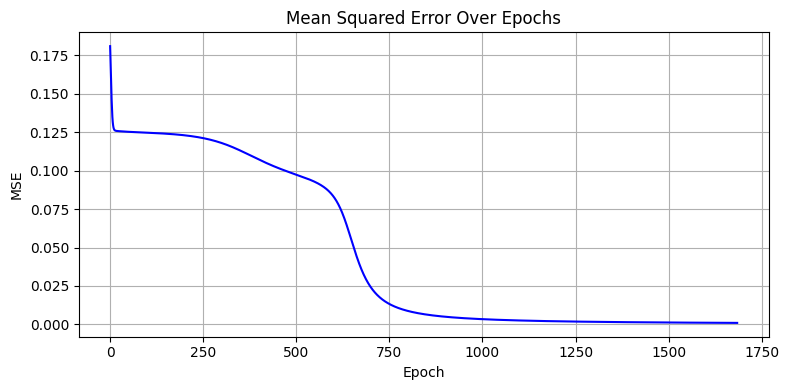

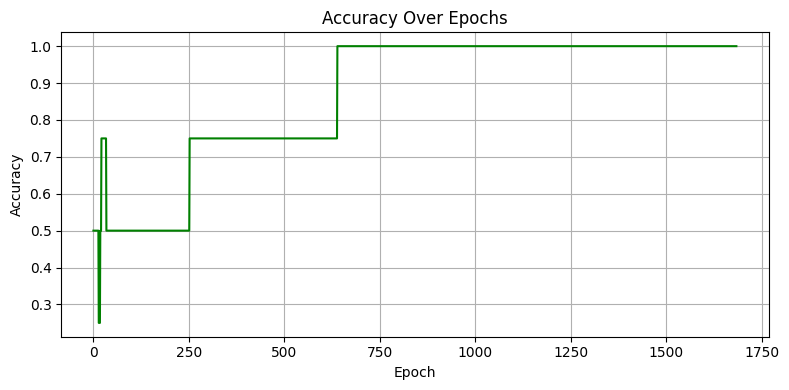

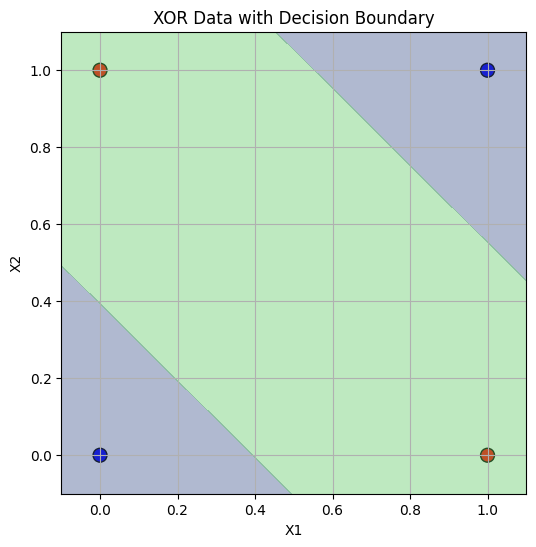

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model

model = Model([
    Layer(units=2, activation="sigmoid", input_size=2),
    Layer(units=1, activation="sigmoid"),
])

x_train = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=float)
y_train = np.array([0,1,1,0],dtype=float)

history = model.fit(x_train, y_train, 0.8, 0.001, 2000)
print(history)

for case in [[0,0],[0,1],[1,0],[1,1]]:
    answer = model.forward(case)
    print(f"Case: {case}, answer: {answer.round()}")

df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', s=100, edgecolors='k')
# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Predict for each point in the grid
Z = np.array([model.forward([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.4)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Data with Decision Boundary")
plt.grid(True)
plt.show()
